### Magics

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

%load_ext watermark
%watermark -a 'Salomon Tetelepta' -d -t -v -p tensorflow,numpy,pandas,matplotlib -g

Salomon Tetelepta 2019-10-10 16:09:31 

CPython 3.7.4
IPython 7.7.0

tensorflow 1.14.0
numpy 1.16.4
pandas 0.25.0
matplotlib 3.1.1
Git hash: 5d73ab3dd5aa979ec5343fdee20f3a54514e5152


### Imports

In [3]:
import os
import sys

import numpy as np
import pandas as pd
import cv2

import random

from pathlib import Path
import matplotlib.pyplot as plt

### Settings

In [6]:
# get project path, and flag if script runs in a file
project_path = Path(os.getcwd(), os.pardir)
output_path = project_path / "output"

# add project root to pythonpath
sys.path.insert(0, str(project_path / "src"))

# import custom packages
from set_cardgame.dataset import *
from set_cardgame.utils import *

# create output folders if they're not there
create_folder_if_not_exists(output_path)
create_folder_if_not_exists(output_path / "gen")

# make results repeatable
seed = 42
# random.seed(seed)  # python built-in pseudo-random generator
# np.random.seed(seed)  # numpy pseudo-random generator
# set_random_seed(seed)  # tensorflow pseudo-random generator

logger = setup_logger(level=logging.INFO)

### Load data

In [19]:
# load training and validation data
X_train, y_train, X_val, y_val = load_dataset(nr_images=81, output_path=output_path / "gen")

Found 243 images belonging to 81 classes.
Found 81 images belonging to 81 classes.


image_name: _10_4057893.png
image_name: _141_2681719.png
image_name: _112_8204298.png
image_name: _167_3386501.png
image_name: _240_7726890.png
image_name: _132_7284953.png
image_name: _9_953959.png
image_name: _117_8357956.png
image_name: _25_6356228.png
image_name: _190_2559272.png
image_name: _154_5748035.png
image_name: .DS_Store


AttributeError: 'NoneType' object has no attribute 'copy'

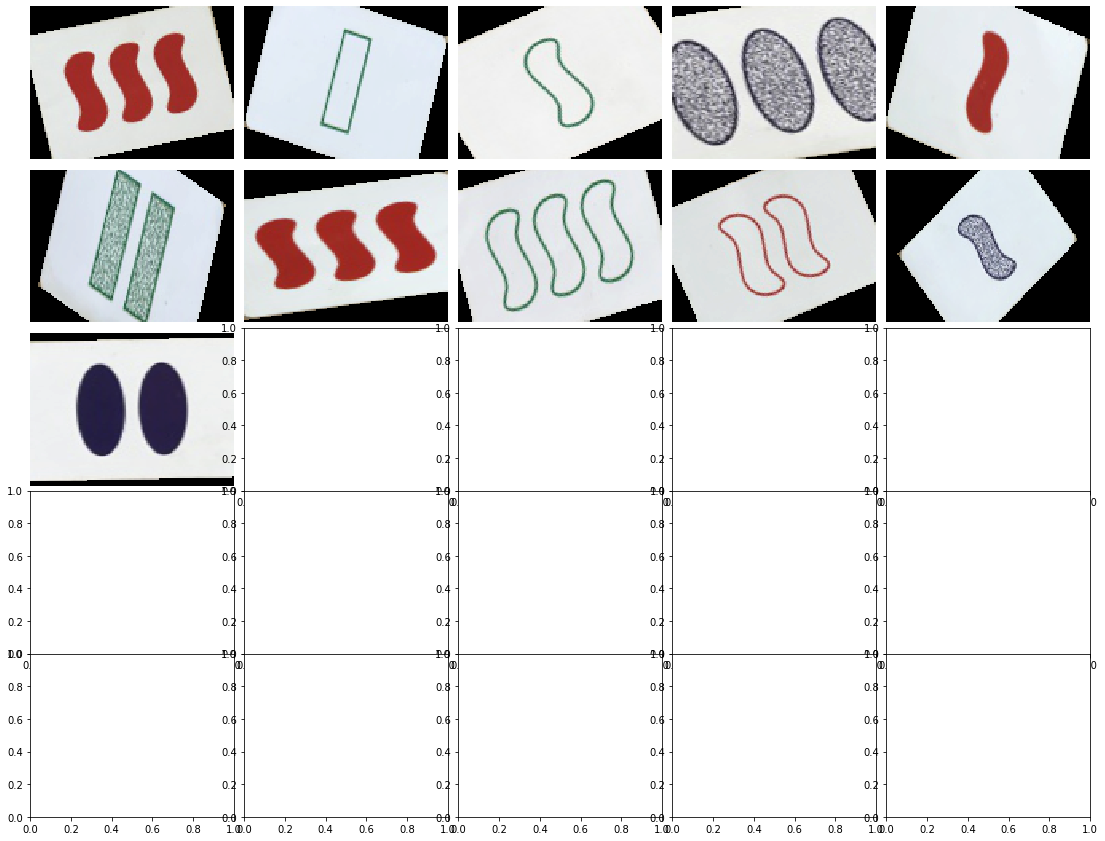

In [21]:
nrows = 5
ncols = 5
fig, axs = plt.subplots(nrows=5, ncols=ncols, figsize=(19, 15), gridspec_kw={'hspace':0, 'wspace':0.05})

for i, image_name in enumerate(os.listdir(output_path / "gen")[:25]):
    r = i // ncols
    c = i % ncols
    print("image_name:", image_name)
    img = read_image_with_cards(output_path / "gen" / image_name, convert_to_rgb=True)
    axs[r, c].imshow(img / 255)
    axs[r, c].axis('off')